# CREDIT CARD FRAUD DETECTION

In [3]:
import pandas as pd

df= pd.read_csv('Downloads/creditcard.csv')
df = pd.DataFrame(df)
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
df = df.drop('Time', axis=1)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
print("DESCRIPTIONS: \n", df.describe())

DESCRIPTIONS: 
                  V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  

In [7]:
print("CHECKING NULL VALUES: \n", df.isnull().sum())

CHECKING NULL VALUES: 
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

[]

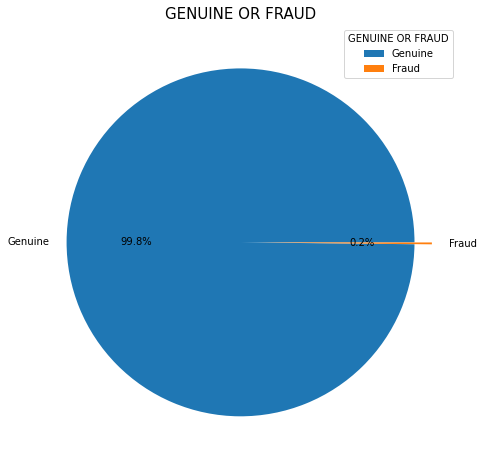

In [9]:
import matplotlib.pyplot as plt
gf=["Genuine","Fraud"]
explode = (0.0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(x=df['Class'].value_counts(), labels=gf, explode=explode, autopct='%1.1f%%')
plt.legend(gf, title='GENUINE OR FRAUD')
plt.title('GENUINE OR FRAUD', fontsize=15)
plt.plot()

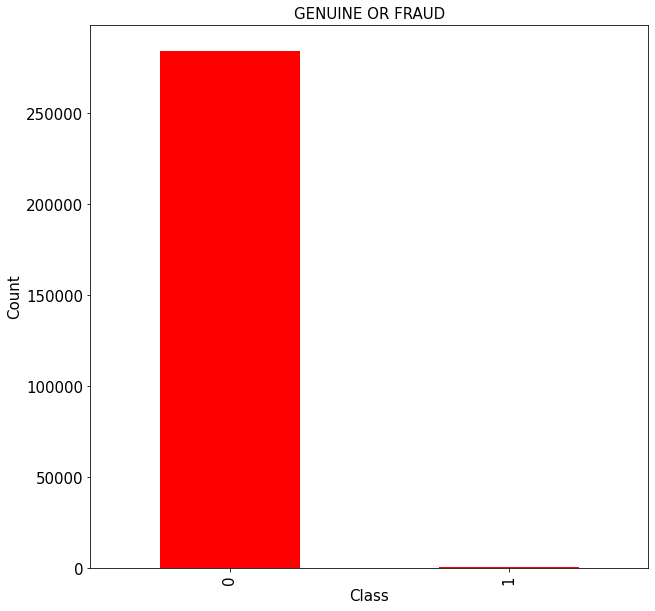

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

df['Class'].value_counts().plot(kind='bar',grid = False,fontsize=15,color='red')
plt.title('GENUINE OR FRAUD', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, cohen_kappa_score

def classify_report(ytest,y_pred):
    cr = classification_report(ytest,y_pred)
    accuracyscore = accuracy_score(ytest,y_pred)
    errorrate = 1-accuracyscore
    cohenkappascore = cohen_kappa_score(ytest,y_pred)
    
    print ("\nClassification Report:\n")
    print("\nAccuracy: ", accuracyscore)
    print("\nError Rate: ",errorrate )
    print("\nKappa Score: ", cohenkappascore)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print('\n\nCLASSIFICATION REPORT: \n\n', classification_report(ytest, ypred))
print('\n\n')
print(classify_report(ytest, ypred))



CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962





Classification Report:


Accuracy:  0.9991222218320986

Error Rate:  0.0008777781679013552

Kappa Score:  0.6946991863504456
None


In [14]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

y_pred_dtc = dtc.predict(xtest)
print('\n\nCLASSIFICATION REPORT: \n\n', classification_report(ytest, ypred))
print('\n\n')
classify_report(ytest,y_pred_dtc)



CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962





Classification Report:


Accuracy:  0.9990695551420246

Error Rate:  0.0009304448579754432

Kappa Score:  0.7409982534673709


AUC value for LR: 0.7907371903460314
AUC value for Decision Tree: 0.8874825218494826


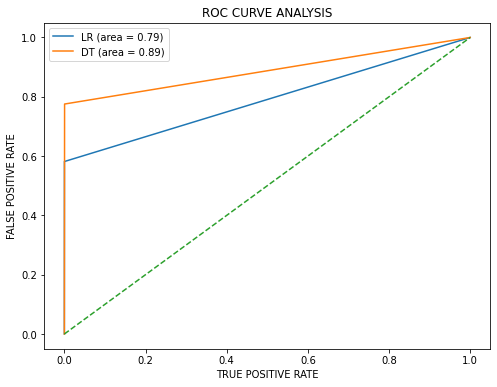

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(ytest,ypred,pos_label=1,drop_intermediate=False)
fpr1,tpr1,thresholds1 = roc_curve(ytest,y_pred_dtc,pos_label=1,drop_intermediate=False)

auc_score_lr = roc_auc_score(ytest,ypred)
auc_score_dtc= roc_auc_score(ytest,y_pred_dtc)

print("AUC value for LR:", auc_score_lr)
print("AUC value for Decision Tree:",auc_score_dtc)

fig= plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,label='LR (area = %0.2f)' %auc_score_lr)
plt.plot(fpr1,tpr1,label='DT (area = %0.2f)' %auc_score_dtc)

plt.legend(loc='best')
plt.plot([0,1],[0,1],'--')

plt.xlabel("TRUE POSITIVE RATE")
plt.ylabel("FALSE POSITIVE RATE")
plt.title('ROC CURVE ANALYSIS')
plt.show()
